In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv("credit.csv")
credit.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


In [3]:
credit.checking_balance.value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [4]:
credit["employment_length"].value_counts()

1 - 4 yrs     339
> 7 yrs       253
4 - 7 yrs     174
0 - 1 yrs     172
unemployed     62
Name: employment_length, dtype: int64

In [5]:
credit["employment_length"].count()

1000

In [6]:
print 'number of missing values in age:', len(credit["employment_length"])-credit["employment_length"].count()

number of missing values in age: 0


In [7]:
credit[["months_loan_duration","amount"]].describe()

,months_loan_duration,amount
count,1000.000000,1000.000000
mean,20.903000,3271.258000
std,12.058814,2822.736876
min,4.000000,250.000000
25%,12.000000,1365.500000
50%,18.000000,2319.500000
75%,24.000000,3972.250000
max,72.000000,18424.000000


In [8]:
credit.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [9]:
#cols = credit.columns.tolist()

cols = ['checking_balance', 'credit_history', 'employment_length', 'foreign_worker', 'housing', 'installment_plan', 
       'job', 'other_debtors', 'personal_status', 'property', 'purpose', 'savings_balance', 'telephone']

col_dicts = {'checking_balance': {'1 - 200 DM': 2,
  '< 0 DM': 1,
  '> 200 DM': 3,
  'unknown': 0},
 'credit_history': {'critical': 0,
  'delayed': 2,
  'fully repaid':3,
  'fully repaid this bank':4,
  'repaid': 1},
 'employment_length': {'0 - 1 yrs': 1,
  '1 - 4 yrs': 2,
  '4 - 7 yrs': 3,
  '> 7 yrs': 4,
  'unemployed': 0},
 'foreign_worker': {'no': 1, 'yes': 0},
 'housing': {'for free': 1, 'own': 0, 'rent': 2},
 'installment_plan': {'bank': 1, 'none': 0, 'stores': 2},
 'job': {'mangement self-employed': 3,
  'skilled employee': 2,
  'unemployed non-resident': 0,
  'unskilled resident': 1},
 'other_debtors': {'co-applicant': 2, 'guarantor': 1, 'none': 0},
 'personal_status': {'divorced male': 2,
  'female': 1,
  'married male': 3,
  'single male': 0},
 'property': {'building society savings': 1,
  'other': 3,
  'real estate': 0,
  'unknown/none': 2},
 'purpose': {'business': 5,
  'car (new)' : 3,
  'car (used)': 4,
  'domestic appliances': 6,
  'education': 1,
  'furniture': 2,
  'others': 8,
  'radio/tv': 0,
  'repairs': 7,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 2,
  '501 - 1000 DM': 3,
  '< 100 DM': 1,
  '> 1000 DM': 4,
 'unknown': 0},
 'telephone': {'none': 1, 'yes': 0}}

In [10]:
for col in cols:
    credit[col] = credit[col].map(col_dicts[col])
    
credit.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1,6,0,0,1169,0,4,4,0,0,...,0,67,0,0,2,1,1,0,0,2
1,2,48,1,0,5951,1,2,2,1,0,...,0,22,0,0,1,2,1,1,0,2
2,0,12,0,1,2096,1,3,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,1,42,1,2,7882,1,3,2,0,1,...,1,45,0,1,1,1,2,1,0,2
4,1,24,2,3,4870,1,2,3,0,0,...,2,53,0,1,2,2,2,1,0,2
5,0,36,1,1,9055,0,2,2,0,0,...,2,35,0,1,1,1,2,0,0,1
6,0,24,1,2,2835,3,4,3,0,0,...,1,53,0,0,1,1,1,1,0,2
7,2,36,1,4,6948,1,2,2,0,0,...,3,35,0,2,1,1,1,0,0,3
8,0,12,1,0,3059,4,3,2,2,0,...,0,61,0,0,1,1,1,1,0,1
9,2,30,0,3,5234,1,0,4,3,0,...,3,28,0,0,2,2,1,1,0,3


In [11]:
from sklearn import cross_validation

y = credit['default']
del credit['default']
X= credit
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
print y_train.value_counts()/len(y_train)
print y_test.value_counts()/len(y_test)

1    0.694286
2    0.305714
Name: default, dtype: float64
1    0.713333
2    0.286667
Name: default, dtype: float64


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a percentage and
 |

In [14]:
model = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

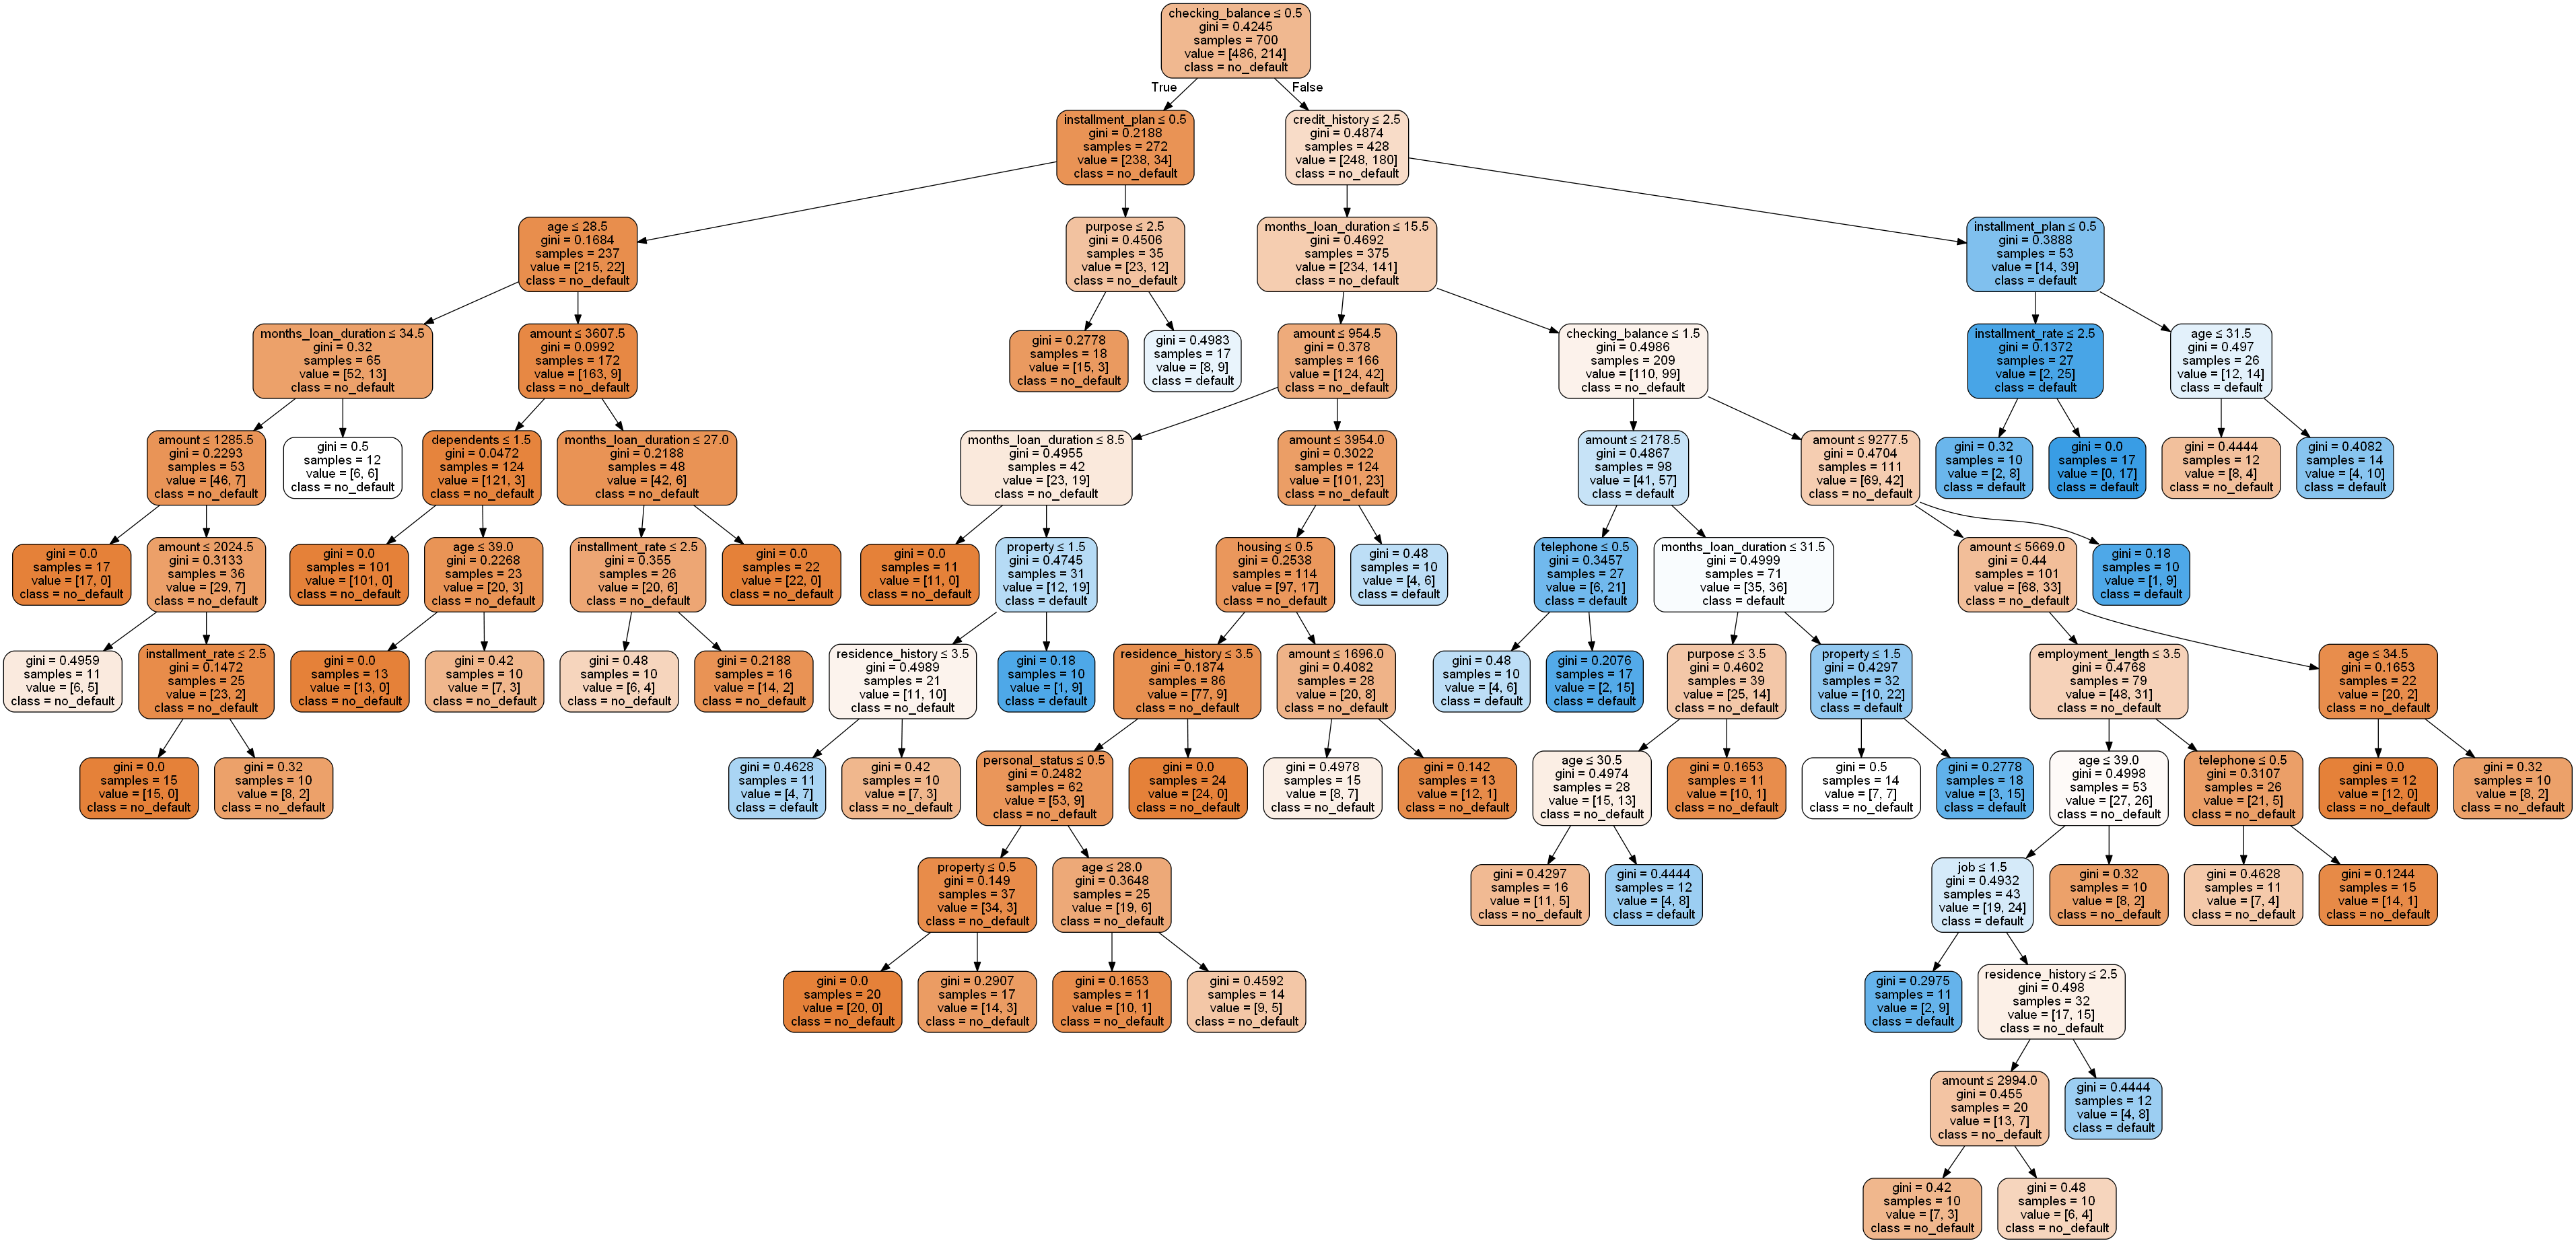

In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot
dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X_train.columns, 
                     class_names = ['no_default', 'default'], filled = True, rounded = True, special_characters = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
#graph[0].write_png("credit.png")
Image(graph[0].create_png())

In [16]:
help(graph[0].create_png)

Help on function <lambda> in module pydot:

<lambda> lambda f='png', prog='dot'
    Refer to the docstring accompanying the 'create' method for more information.



In [17]:
help(pydot.graph_from_dot_data)

Help on function graph_from_dot_data in module pydot:

graph_from_dot_data(s)
    Load graphs from DOT description in (unicode) string `s`.
    
    The data is assumed to be in DOT format. It will
    be parsed and a Dot class will be returned,
    representing the graph.



In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred)
print metrics.confusion_matrix(y_test, y_pred)
print metrics.accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          1       0.79      0.79      0.79       214
          2       0.48      0.49      0.49        86

avg / total       0.70      0.70      0.70       300

[[169  45]
 [ 44  42]]
0.703333333333


c:\python27\lib\site-packages\numpy\core\fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [20]:
class_weight = {1:1, 2:4}
improved_model = DecisionTreeClassifier(max_depth = 6, class_weight = class_weight)
improved_model.fit(X_train, y_train)
y_improved_pred = improved_model.predict(X_test)

In [21]:
print metrics.classification_report(y_test, y_improved_pred)
print metrics.confusion_matrix(y_test, y_improved_pred)
print metrics.accuracy_score(y_test, y_improved_pred)

             precision    recall  f1-score   support

          1       0.87      0.47      0.61       214
          2       0.39      0.83      0.53        86

avg / total       0.73      0.57      0.59       300

[[101 113]
 [ 15  71]]
0.573333333333
